In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1500)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
# TensorFlow2.0教程-卷积自编码器

In [2]:
# 1.导入数据

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
print(tf.__version__)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = tf.expand_dims(x_train.astype('float32'), -1) / 255.0
x_test = tf.expand_dims(x_test.astype('float32'),-1) / 255.0

2.0.0-beta1


In [4]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


In [5]:
# 2.构造网络

In [7]:
inputs = layers.Input(shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]), name='inputs')
print(inputs.shape)
code = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
code = layers.MaxPool2D((2,2), padding='same')(code)
print(code.shape)
decoded = layers.Conv2D(16, (3,3), activation='relu', padding='same')(code)
decoded = layers.UpSampling2D((2,2))(decoded)
print(decoded.shape)
outputs = layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')(decoded)
print(outputs.shape)
auto_encoder = keras.Model(inputs, outputs)

auto_encoder.compile(optimizer=keras.optimizers.Adam(),
                    loss=keras.losses.BinaryCrossentropy())
keras.utils.plot_model(auto_encoder, show_shapes=True)

(None, 28, 28, 1)
(None, 14, 14, 16)
(None, 28, 28, 16)
(None, 28, 28, 1)
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [8]:
# 3.训练与测试

In [9]:
early_stop = keras.callbacks.EarlyStopping(patience=2, monitor='loss')
auto_encoder.fit(x_train,x_train, batch_size=64, epochs=1, validation_split=0.1,validation_freq=10,
                callbacks=[early_stop])


W0712 05:28:17.213117 139671708202752 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 6s 108us/sample - loss: 0.0982


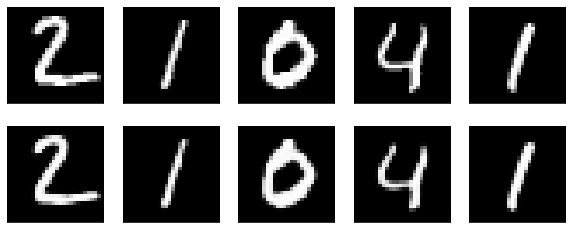

In [11]:
import matplotlib.pyplot as plt
decoded = auto_encoder.predict(x_test)
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(tf.reshape(x_test[i+1],(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(tf.reshape(decoded[i+1],(28, 28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()